<a href="https://colab.research.google.com/github/RohitChourey/DataScience/blob/main/Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Random Forest Model**

In [3]:
#DS Libraries
import pandas as pd
import numpy as np

#Graphic Libraries
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
bank_df = pd.read_csv("BankMarketingData.csv")

In [5]:
bank_df.head()

,S.No,age,job,BlueCollar,SelfEmployed,Management,Unemployed,marital,Divorced,Married,...,CreditDefault,balance,housing,HousingLoan,loan,PersonalLoan,campaign,previous,y,SubscriptionY
0,1,59.0,unemployed,0.0,0.0,0.0,1.0,married,0.0,1.0,...,0.0,0.0,no,0.0,no,0.0,2.0,0.0,no,0
1,2,36.0,Others,0.0,1.0,0.0,0.0,married,0.0,1.0,...,0.0,3057.0,no,0.0,no,0.0,4.0,0.0,yes,1
2,3,47.0,blue-collar,1.0,0.0,0.0,0.0,divorced,1.0,0.0,...,0.0,126.0,yes,1.0,no,0.0,2.0,0.0,yes,1
3,4,43.0,management,0.0,0.0,1.0,0.0,divorced,1.0,0.0,...,0.0,388.0,yes,1.0,no,0.0,2.0,0.0,yes,1
4,5,34.0,self-employed,0.0,1.0,0.0,0.0,single,0.0,0.0,...,0.0,462.0,no,0.0,no,0.0,3.0,0.0,yes,1


In [6]:
bank_df.shape

(4521, 25)

In [7]:
bank_df['SubscriptionY'].value_counts()

0    4000
1     521
Name: SubscriptionY, dtype: int64

In term of percent we will check the value count for SubscriptionY column

In [8]:
round(bank_df['SubscriptionY'].value_counts(normalize=True)*100,1)

0    88.5
1    11.5
Name: SubscriptionY, dtype: float64

**import resample from package**

In [9]:
from sklearn.utils import resample

In [10]:
bank_sub_no = bank_df[bank_df.SubscriptionY == 0]
bank_sub_yes = bank_df[bank_df.SubscriptionY == 1]

In [11]:
df_min_upsample = resample(bank_sub_yes, replace=True, n_samples=2000)

In [12]:
new_bank_df = pd.concat([bank_sub_no, df_min_upsample])

In [13]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [14]:
new_bank_df['SubscriptionY'].value_counts()

0    4000
1    2000
Name: SubscriptionY, dtype: int64

In [15]:
round(new_bank_df['SubscriptionY'].value_counts(normalize=True)*100,1)

0    66.7
1    33.3
Name: SubscriptionY, dtype: float64

In [16]:
from ast import Subscript
XX_features = list(new_bank_df.columns)
XX_features.remove('SubscriptionY')
X_features=list(['age','job','marital','education','default','balance','HousingLoan','PersonalLoan','campaign','previous'])
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'HousingLoan',
 'PersonalLoan',
 'campaign',
 'previous']

In [17]:
encoded_bank_df = pd.get_dummies(new_bank_df[X_features], drop_first=True)

In [18]:
X = encoded_bank_df
Y = new_bank_df['SubscriptionY']

In [19]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.3, random_state=42)

**Random Forest Model**

In [20]:
print(train_X.shape)
print(test_X.shape)

(4200, 16)
(1800, 16)


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
Rdf = RandomForestClassifier(max_depth=10, n_estimators = 10)
Rdf.fit(train_X, train_Y)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [23]:
pred_Y = Rdf.predict(test_X)

array([1, 0, 0, ..., 0, 0, 0])

**Checking Accuracy of model**

In [37]:
from sklearn import metrics

def drew_cm(actual, predicted):
  cm = metrics.confusion_matrix(actual, predicted)
  sn.heatmap(cm, annot=True, fmt='.2f',
             xticklabels = ['Not Subscribed', 'Subscribed'],
             yticklabels= ['Not Subscribed', 'Subscribed'])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


In [38]:
def print_model_metrics(test_y, pred_y):
  print(metrics.classification_report(test_y, pred_y))
  print('accuracy= ', round(float(metrics.accuracy_score(test_y, pred_y)),2))
  print('recall= ', round(float(metrics.recall_score(test_y, pred_y)),2))
  print('precision= ', round(float(metrics.precision_score(test_y, pred_y)),2))
  print('roc_auc= ', round(float(metrics.roc_auc_score(test_y, pred_y)),2))

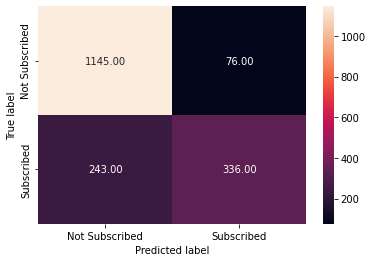

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1221
           1       0.82      0.58      0.68       579

    accuracy                           0.82      1800
   macro avg       0.82      0.76      0.78      1800
weighted avg       0.82      0.82      0.81      1800

accuracy=  0.82
recall=  0.58
precision=  0.82
roc_auc=  0.76


In [40]:
cm = drew_cm(test_Y, pred_Y)
print_model_metrics(test_Y, pred_Y)

In [42]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [10,15],
                     'n_estimators': [10,20],
                     'max_features': ['sqrt', 0.2]}]

In [43]:
Rdf = RandomForestClassifier()

clf = GridSearchCV(Rdf, tuned_parameters, cv=5, scoring='roc_auc')

clf.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [44]:
clf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}

In [46]:
Rdf= RandomForestClassifier(max_depth=15, max_features=0.2, n_estimators=20)

Rdf.fit(train_X, train_Y)

RandomForestClassifier(max_depth=15, max_features=0.2, n_estimators=20)

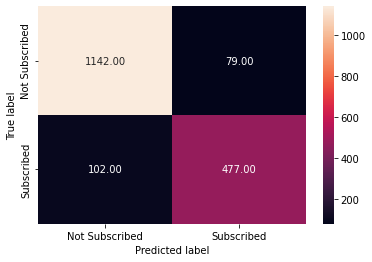

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1221
           1       0.86      0.82      0.84       579

    accuracy                           0.90      1800
   macro avg       0.89      0.88      0.88      1800
weighted avg       0.90      0.90      0.90      1800

accuracy=  0.9
recall=  0.82
precision=  0.86
roc_auc=  0.88


In [47]:
pred_Y = Rdf.predict(test_X)

cm = drew_cm(test_Y, pred_Y)

print_model_metrics(test_Y, pred_Y)

In [50]:
feature_rank = pd.DataFrame({'feature':train_X.columns,
                             'importance':Rdf.feature_importances_})

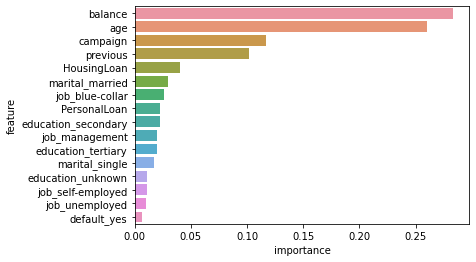

In [51]:
feature_rank = feature_rank.sort_values('importance', ascending=False)
sn.barplot(y = 'feature', x='importance', data=feature_rank);

In [52]:
feature_rank['cumsum'] = feature_rank.importance.cumsum()*100
feature_rank.head(10)

,feature,importance,cumsum
1,balance,0.283586,28.358573
0,age,0.259722,54.330808
4,campaign,0.116720,66.002806
5,previous,0.101832,76.185963
2,HousingLoan,0.040768,80.262714
10,marital_married,0.029647,83.227428
6,job_blue-collar,0.026162,85.843607
3,PersonalLoan,0.023054,88.148960
12,education_secondary,0.022183,90.367253
7,job_management,0.020153,92.382588
